In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from scipy import ndimage
import numpy as np
from PIL import Image, ImageFilter
from sklearn.preprocessing import MinMaxScaler

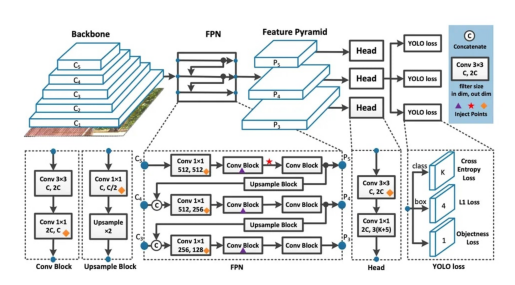

In [2]:
# sa se vizualizeze una din imagini

# Funcție pentru afișarea unei imagini
def show_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
# Directorul cu imagini
image_folder = "data/images"
# Obține lista de imagini din director
images = os.listdir(image_folder)

# Afișarea unei imagini
crtDir =  os.getcwd()
image_path = os.path.join(crtDir, image_folder, "YOLO.jpg")
show_image(image_path)

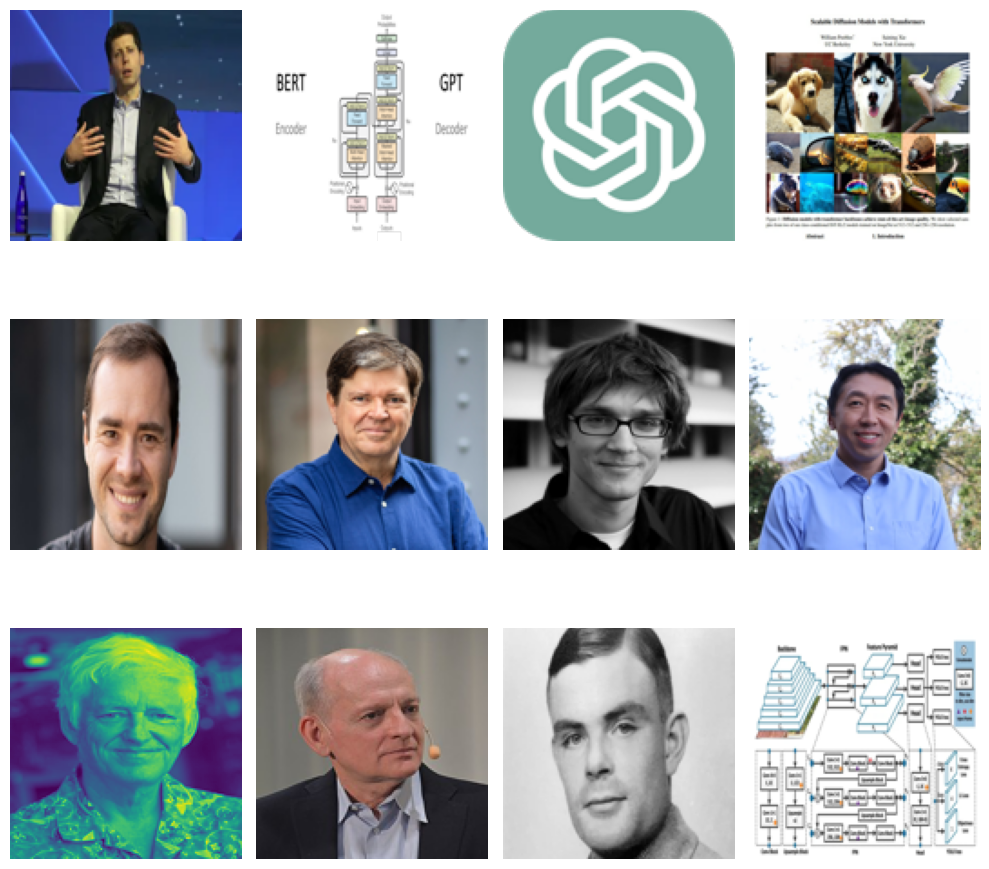

In [3]:
# daca imaginile nu au aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli 
# si sa se vizualizeze imaginile intr-un cadru tabelar

# Funcție pentru redimensionarea imaginii
def resize_image(image_path, target_width=128, target_height=128):
    image = Image.open(image_path) # Deschide imaginea folosind PIL
    resized_image = image.resize((target_width, target_height)) # Redimensionează imaginea
    return resized_image

def plot_images_in_grid(images, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

resized_images = []
for img in images:
    image_path = os.path.join(image_folder, img)
    resized_image = resize_image(image_path, 128, 128)
    resized_images.append(resized_image)

# Afișează imaginile redimensionate într-un cadru tabelar
plot_images_in_grid(resized_images, 3, 4)  # 3 rânduri, 4 coloane pentru 12 imagini

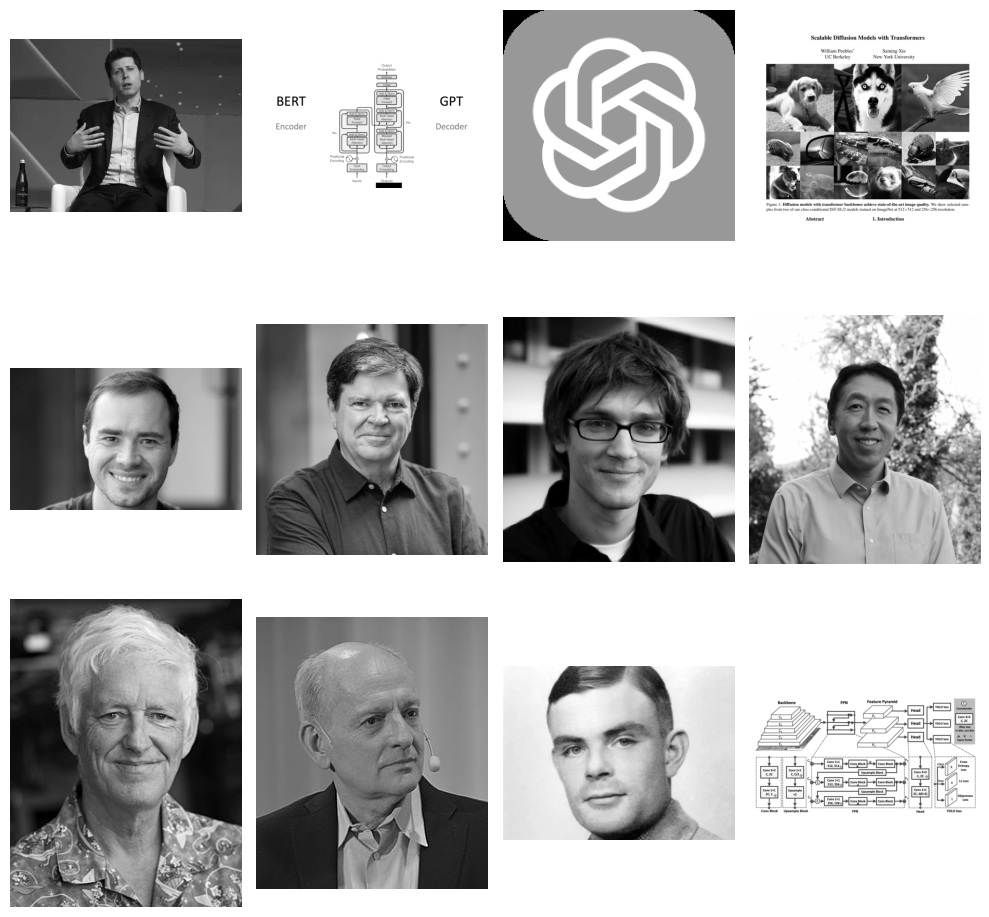

In [4]:
# sa se transforme imaginile in format gray-levels si sa se vizualizeze

# Functie de convertire a imaginii la tonuri de gri
def convert_to_gray(image):
    gray_image = image.convert('L')
    return gray_image

def plot_images_in_grid(images, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

gray_images = []
for img in images:
    image_path = os.path.join(image_folder, img)
    image = Image.open(image_path)
    gray_image = convert_to_gray(image)
    gray_images.append(gray_image)
        
plot_images_in_grid(gray_images, 3, 4)

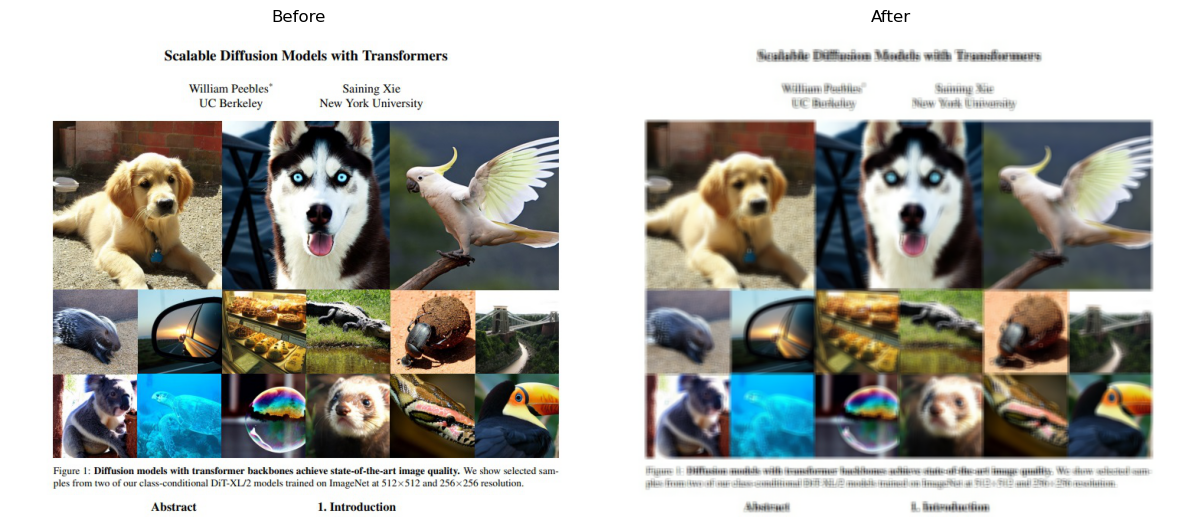

In [5]:
# sa se blureze o imagine si sa se afiseze in format "before-after"

# Functie care aplica efectul de blur
def apply_blur(image):
    blurred_image = image.filter(ImageFilter.BLUR)
    return blurred_image

def plot_before_after(original_image, processed_image):
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))
    axes[0].imshow(original_image)
    axes[0].set_title('Before')
    axes[0].axis('off')
    axes[1].imshow(processed_image)
    axes[1].set_title('After')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

image_path = os.path.join(image_folder, "diffusionModel.jpg")
original_image = Image.open(image_path)
blurred_image = apply_blur(original_image)

# Afișarea imagii "before-after" într-un cadru tabelar
plot_before_after(original_image, blurred_image)

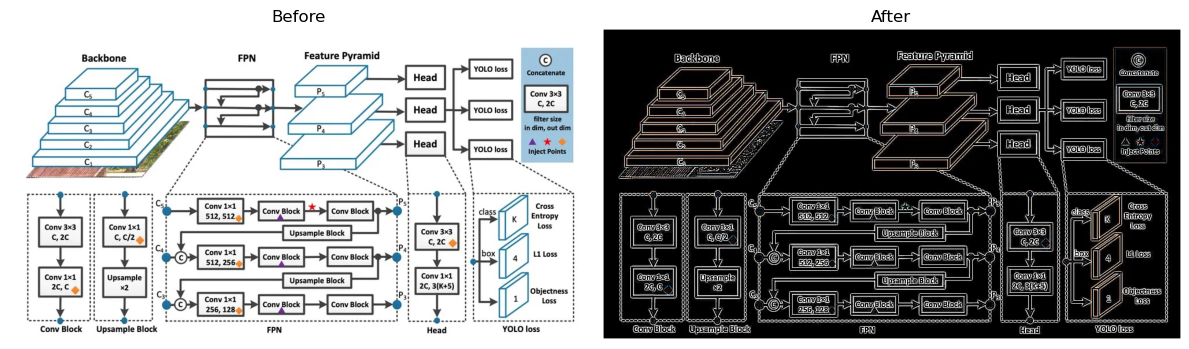

In [10]:
# sa se identifice muchiile intr-o imagine si sa se afiseze in format "before-after"

# Funcție pentru identificarea muchiilor unei imagini
def detect_edges(image):
    edges = image.filter(ImageFilter.FIND_EDGES)
    return edges

image_path = os.path.join(image_folder, "YOLO.jpg")
original_image = Image.open(image_path)
edges_image = detect_edges(original_image)

plot_before_after(original_image, edges_image)

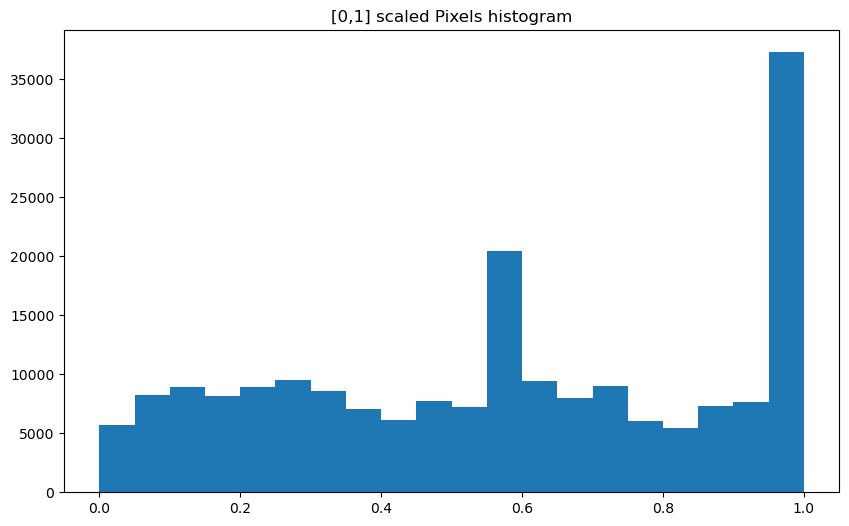

In [7]:
# Normalizarea informatiilor: valorile pixelilor din imagini

# [0, 1] scalling
# it helps to map data into the same range

normalized_images = []
images_array = []
for img in images:
    image_path = os.path.join(image_folder, img)
    image = Image.open(image_path)
    
    resized_image = image.resize((128, 128)) #redimensioneaza imaginea
    
    gray_image = convert_to_gray(resized_image) #converteste imaginea la tonuri de gri
    
    # transforma imaginea într-un tablou numpy și normalizează valorile pixelilor
    numpy_image = np.array(gray_image)
    flattened_image = numpy_image.flatten()
    normalized_image = (flattened_image - np.min(flattened_image)) / (np.max(flattened_image) - np.min(flattened_image))
    normalized_images.append(normalized_image)

# converteste lista de imagini normalizate intr-un tablou numpy bidimensional
normalized_array = np.array(normalized_images)

# matricea de pixeli dupa normalizare
flattened_images_after = normalized_array.reshape(-1)

# Plot the normalized values
plt.figure(figsize=(10, 6))
plt.hist(flattened_images_after, bins=20)
plt.title('[0,1] scaled Pixels histogram')
plt.show()